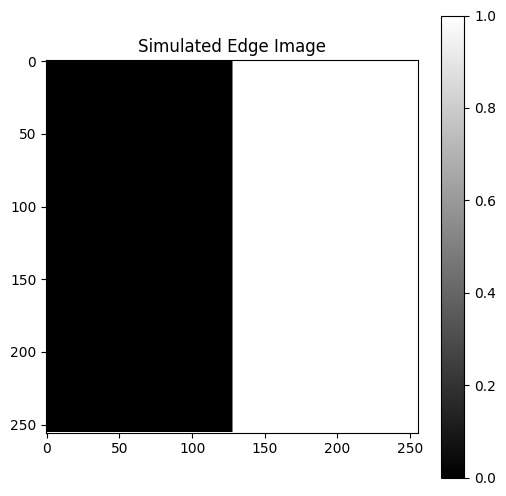

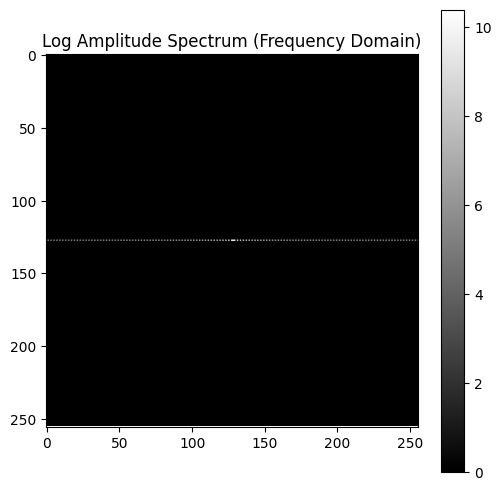

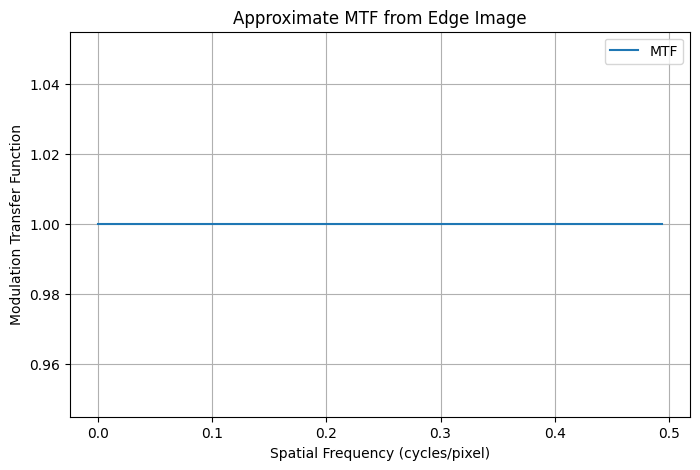


Detective Quantum Efficiency (DQE):
- DQE measures how efficiently a detector converts input signal (electrons) to output image information.
- It is computed as DQE = (SNR_out / SNR_in)², where SNR is the signal-to-noise ratio.
- To compute DQE, we need:
  1. Noise power spectrum (NPS) from the Fourier Transform of a uniform image.
  2. Signal power spectrum from a known input.
  3. Comparison of input and output SNR.
- This requires a noise model (e.g., Poisson noise for electron detection), which is complex to simulate accurately.
- In practice, DQE is frequency-dependent and drops at high frequencies due to noise amplification.



In [1]:
# Title: Introduction to MTF and Frequency Domain Analysis in Electron Microscopy

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Section 1: Create a Simulated Image (Sharp Edge)
# Simulate a 256x256 image with a sharp edge to mimic a test pattern
image_size = 256
image = np.zeros((image_size, image_size))
image[:, image_size//2:] = 1  # Right half is bright (step edge)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Simulated Edge Image')
plt.colorbar()
plt.show()

# Section 2: Transform to Frequency Domain
# Compute the 2D Fourier Transform of the image
fft_image = np.fft.fft2(image)
fft_image_shifted = np.fft.fftshift(fft_image)  # Shift zero frequency to center

# Compute the amplitude spectrum (for visualization)
amplitude_spectrum = np.log1p(np.abs(fft_image_shifted))

# Display the Fourier Transform
plt.figure(figsize=(6, 6))
plt.imshow(amplitude_spectrum, cmap='gray')
plt.title('Log Amplitude Spectrum (Frequency Domain)')
plt.colorbar()
plt.show()

# Section 3: Compute MTF from the Edge Image
# MTF is often derived from the Line Spread Function (LSF) or Point Spread Function (PSF)
# Here, we approximate MTF using the derivative of the edge (Edge Spread Function -> LSF)
# Take a 1D profile across the edge (middle row)
edge_profile = image[image_size//2, :]

# Compute the Line Spread Function (LSF) as the derivative of the edge profile
lsf = np.diff(edge_profile)

# Compute the Fourier Transform of the LSF to get MTF
mtf = np.abs(np.fft.fft(lsf))
mtf = mtf / mtf[0]  # Normalize to 1 at zero frequency
freq = np.fft.fftfreq(len(lsf))

# Keep only positive frequencies for plotting
positive_freq = freq[:len(freq)//2]
mtf_positive = mtf[:len(mtf)//2]

# Plot the MTF
plt.figure(figsize=(8, 5))
plt.plot(positive_freq, mtf_positive, label='MTF')
plt.xlabel('Spatial Frequency (cycles/pixel)')
plt.ylabel('Modulation Transfer Function')
plt.title('Approximate MTF from Edge Image')
plt.grid(True)
plt.legend()
plt.show()

# Section 4: Discussion on DQE (Conceptual)
print("""
Detective Quantum Efficiency (DQE):
- DQE measures how efficiently a detector converts input signal (electrons) to output image information.
- It is computed as DQE = (SNR_out / SNR_in)², where SNR is the signal-to-noise ratio.
- To compute DQE, we need:
  1. Noise power spectrum (NPS) from the Fourier Transform of a uniform image.
  2. Signal power spectrum from a known input.
  3. Comparison of input and output SNR.
- This requires a noise model (e.g., Poisson noise for electron detection), which is complex to simulate accurately.
- In practice, DQE is frequency-dependent and drops at high frequencies due to noise amplification.
""")